In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.pipeline import Pipeline

from sklearn.metrics import r2_score, mean_squared_error, root_mean_squared_error, mean_absolute_error, mean_absolute_percentage_error

import shap

In [2]:
data = pd.read_csv('Housing.csv')

In [3]:
data

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished


In [4]:
data.drop_duplicates(inplace= True)

In [5]:
data.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [6]:
data.isnull().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

In [7]:
# No duplicate values - No Nan values

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [9]:
data.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


In [10]:
# Boxplot

In [11]:
data.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [12]:
data = data.replace({'yes': 1, 'no': 2})

C:\Users\Apostolis Karapatis\AppData\Local\Temp\ipykernel_18888\542018002.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data = data.replace({'yes': 1, 'no': 2})


In [13]:
data

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,2,2,2,1,2,1,furnished
1,12250000,8960,4,4,4,1,2,2,2,1,3,2,furnished
2,12250000,9960,3,2,2,1,2,1,2,2,2,1,semi-furnished
3,12215000,7500,4,2,2,1,2,1,2,1,3,1,furnished
4,11410000,7420,4,1,2,1,1,1,2,1,2,2,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,1,2,1,2,2,2,2,unfurnished
541,1767150,2400,3,1,1,2,2,2,2,2,0,2,semi-furnished
542,1750000,3620,2,1,1,1,2,2,2,2,0,2,unfurnished
543,1750000,2910,3,1,1,2,2,2,2,2,0,2,furnished


In [14]:
data_numerical_wt_area = data.drop(columns= ['price', 'furnishingstatus', 'area'])

In [15]:
data_numerical_wt_area


,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea
0,4,2,3,1,2,2,2,1,2,1
1,4,4,4,1,2,2,2,1,3,2
2,3,2,2,1,2,1,2,2,2,1
3,4,2,2,1,2,1,2,1,3,1
4,4,1,2,1,1,1,2,1,2,2
...,...,...,...,...,...,...,...,...,...,...
540,2,1,1,1,2,1,2,2,2,2
541,3,1,1,2,2,2,2,2,0,2
542,2,1,1,1,2,2,2,2,0,2
543,3,1,1,2,2,2,2,2,0,2


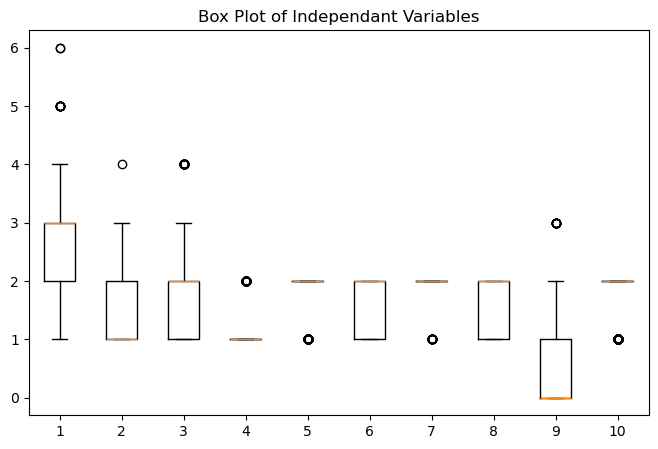

In [16]:
fig = plt.figure(figsize= (8,5))
plt.boxplot(data_numerical_wt_area)
plt.title('Box Plot of Independant Variables')
plt.show()

In [17]:
data_area = data['area']

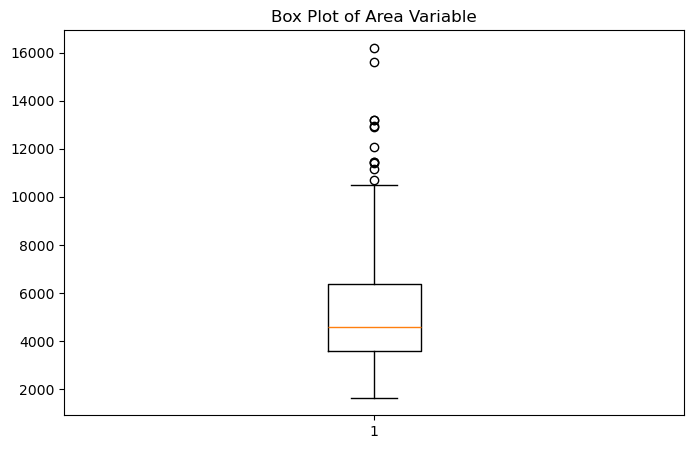

In [18]:
fig = plt.figure(figsize= (8,5))
plt.boxplot(data_area)
plt.title('Box Plot of Area Variable')
plt.show()

In [19]:
data.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,2,2,2,1,2,1,furnished
1,12250000,8960,4,4,4,1,2,2,2,1,3,2,furnished
2,12250000,9960,3,2,2,1,2,1,2,2,2,1,semi-furnished
3,12215000,7500,4,2,2,1,2,1,2,1,3,1,furnished
4,11410000,7420,4,1,2,1,1,1,2,1,2,2,furnished


In [20]:
x1 = data['area']
x2 = data['bedrooms']
x3 = data['bathrooms']
x4  = data['stories']
x5 = data['mainroad']
x6 = data['guestroom']
x7 = data['basement']
x8 = data['hotwaterheating']
x9 = data['airconditioning']
x10 = data['parking']
x11 = data['prefarea']
x12 = data['furnishingstatus']

y = data['price']

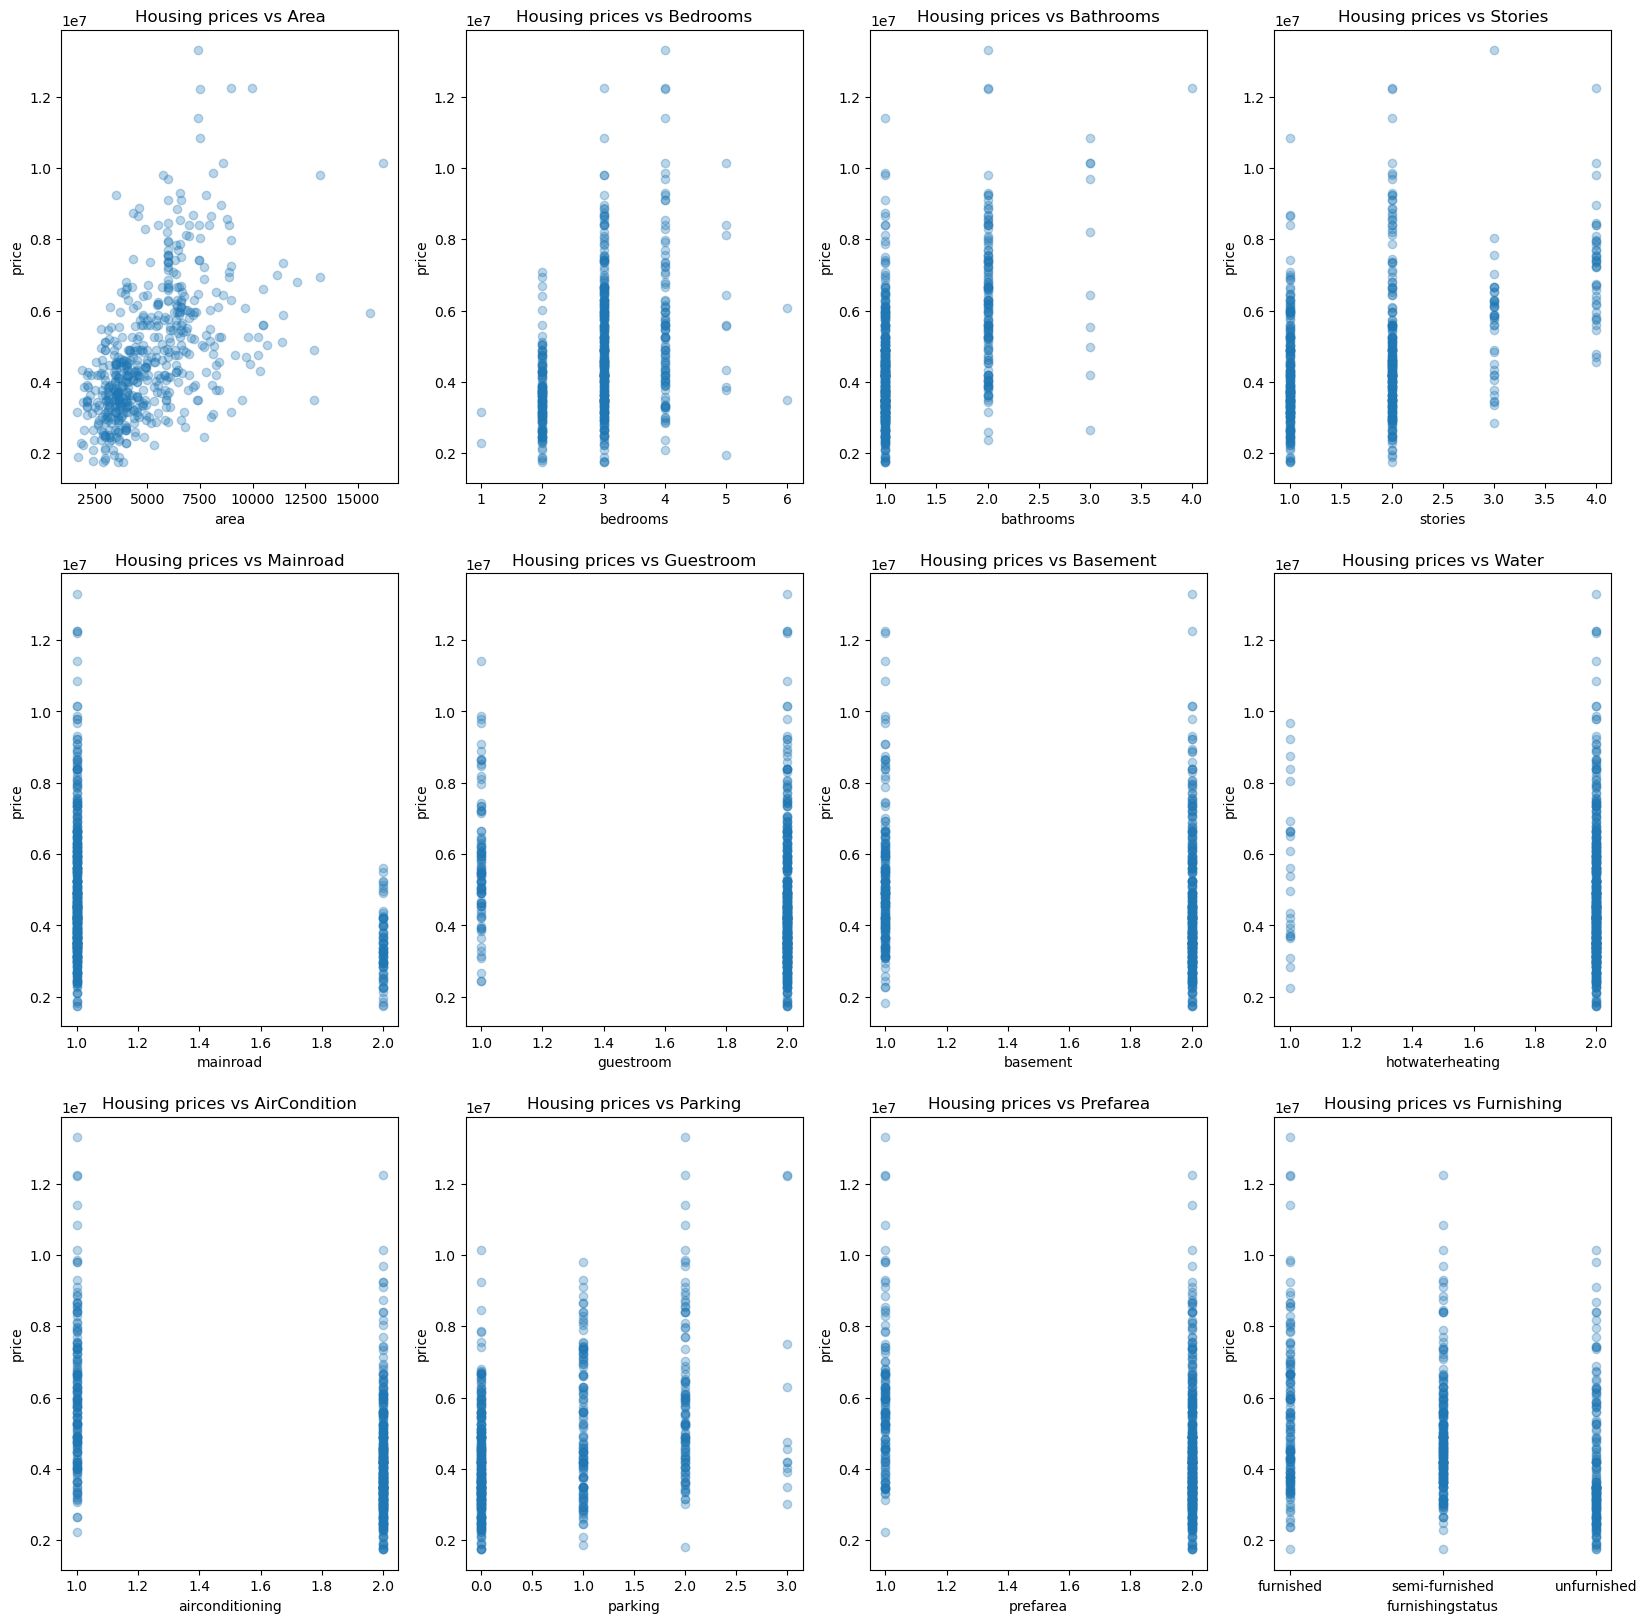

In [21]:
figure, axis = plt.subplots(3,4, figsize = (20,20))

size = 12
al = 0.3

axis[0,0].scatter(x1, y, alpha = al)
axis[0,0].set_title('Housing prices vs Area', fontsize = size)
axis[0,0].set_xlabel('area')
axis[0,0].set_ylabel('price')

axis[0,1].scatter(x2, y, alpha = al)
axis[0,1].set_title('Housing prices vs Bedrooms', fontsize = size)
axis[0,1].set_xlabel('bedrooms')
axis[0,1].set_ylabel('price')

axis[0,2].scatter(x3, y, alpha = al)
axis[0,2].set_title('Housing prices vs Bathrooms', fontsize = size)
axis[0,2].set_xlabel('bathrooms')
axis[0,2].set_ylabel('price')

axis[0,3].scatter(x4, y, alpha = al)
axis[0,3].set_title('Housing prices vs Stories', fontsize = size)
axis[0,3].set_xlabel('stories')
axis[0,3].set_ylabel('price')

axis[1,0].scatter(x5, y, alpha = al)
axis[1,0].set_title('Housing prices vs Mainroad', fontsize = size)
axis[1,0].set_xlabel('mainroad')
axis[1,0].set_ylabel('price')

axis[1,1].scatter(x6, y, alpha = al)
axis[1,1].set_title('Housing prices vs Guestroom', fontsize = size)
axis[1,1].set_xlabel('guestroom')
axis[1,1].set_ylabel('price')

axis[1,2].scatter(x7, y, alpha = al)
axis[1,2].set_title('Housing prices vs Basement', fontsize = size)
axis[1,2].set_xlabel('basement')
axis[1,2].set_ylabel('price')

axis[1,3].scatter(x8, y, alpha = al)
axis[1,3].set_title('Housing prices vs Water', fontsize = size)
axis[1,3].set_xlabel('hotwaterheating')
axis[1,3].set_ylabel('price')

axis[2,0].scatter(x9, y, alpha = al)
axis[2,0].set_title('Housing prices vs AirCondition', fontsize = size)
axis[2,0].set_xlabel('airconditioning')
axis[2,0].set_ylabel('price')

axis[2,1].scatter(x10, y, alpha = al)
axis[2,1].set_title('Housing prices vs Parking', fontsize = size)
axis[2,1].set_xlabel('parking')
axis[2,1].set_ylabel('price')

axis[2,2].scatter(x11, y, alpha = al)
axis[2,2].set_title('Housing prices vs Prefarea', fontsize = size)
axis[2,2].set_xlabel('prefarea')
axis[2,2].set_ylabel('price')

axis[2,3].scatter(x12, y, alpha = al)
axis[2,3].set_title('Housing prices vs Furnishing', fontsize = size)
axis[2,3].set_xlabel('furnishingstatus')
axis[2,3].set_ylabel('price')

plt.show()


In [22]:
data_numerical = data.drop(columns='furnishingstatus')

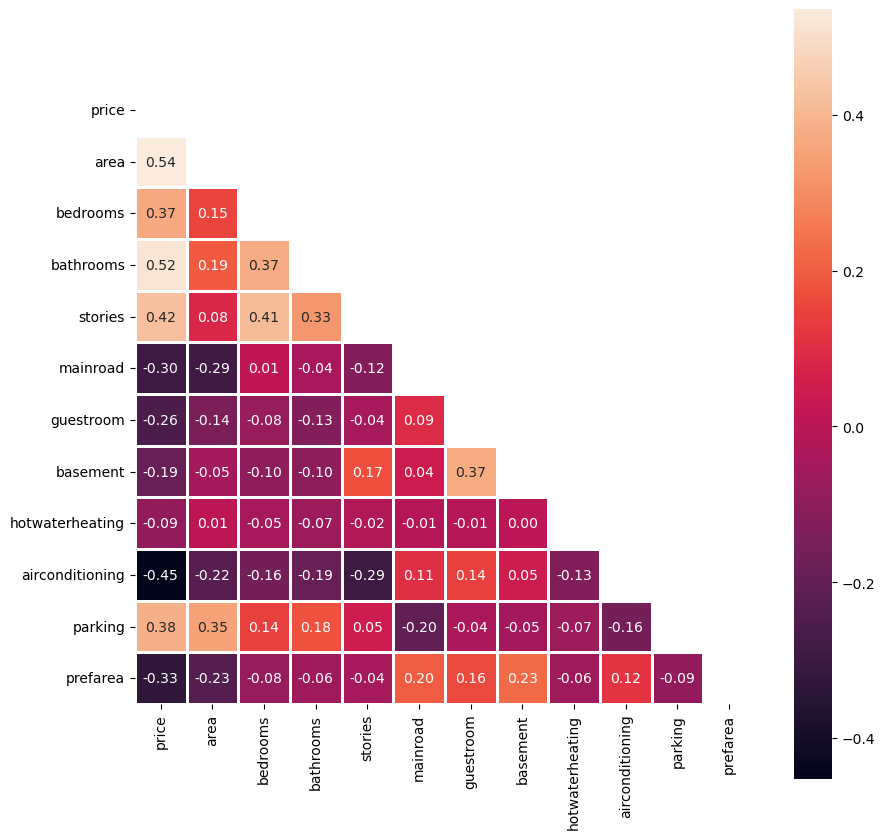

In [23]:
matrix = data_numerical.corr()

plt.figure(figsize=(10,10))
mask = np.triu(np.ones_like(matrix, dtype=bool))

sns.heatmap(matrix, mask = mask, cmap = 'rocket', square=True, annot=True, fmt='.2f', linewidths=1)

plt.show()

In [24]:
data['furnishingstatus'].value_counts()

furnishingstatus
semi-furnished    227
unfurnished       178
furnished         140
Name: count, dtype: int64

In [25]:
data_encoded = pd.get_dummies(data, columns=['furnishingstatus']).astype(int)

In [26]:
data_encoded

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus_furnished,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
0,13300000,7420,4,2,3,1,2,2,2,1,2,1,1,0,0
1,12250000,8960,4,4,4,1,2,2,2,1,3,2,1,0,0
2,12250000,9960,3,2,2,1,2,1,2,2,2,1,0,1,0
3,12215000,7500,4,2,2,1,2,1,2,1,3,1,1,0,0
4,11410000,7420,4,1,2,1,1,1,2,1,2,2,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,1,2,1,2,2,2,2,0,0,1
541,1767150,2400,3,1,1,2,2,2,2,2,0,2,0,1,0
542,1750000,3620,2,1,1,1,2,2,2,2,0,2,0,0,1
543,1750000,2910,3,1,1,2,2,2,2,2,0,2,1,0,0
